In [13]:
import requests
import json
from matplotlib import pyplot as plt
import numpy as np

from Chandra.Time import DateTime

from plot_cxctime_custom import *

% matplotlib notebook

Define the URL (beginning removed for security reasons).

In [2]:
url_beginning = ''
url = url_beginning + '/maude/mrest/FLIGHT/aosares1.json?ts=2015264.000000&tp=2015266.010000&hr=t'

Retrieve the data.

In [3]:
jsondata = requests.get(url)
jsondata

<Response [200]>

Convert to a Python Dict datastructure for easier access.

In [4]:
d = dict(jsondata.json())

Explore this dictionary for a bit.

In [5]:
d.keys()

[u'data-fmt-1']

In [6]:
d['data-fmt-1'].keys()

[u'f', u'i', u'n', u'values', u'times', u'tc']

Pull out the time and value data to make it easier to work with.

In [7]:
times = np.array(d['data-fmt-1']['times'])
vals = d['data-fmt-1']['values']

Note that there is no decimal place included. Dividing by 1e9 converts this to a standard GRETA time format.

In [8]:
times[0]

2015264000001626

In [9]:
times[0]/1.e9

2015264.0000016261

In [10]:
DateTime(times[0]/1.e9, format='greta').date

'2015:264:00:00:01.626'

In [11]:
times = DateTime(np.array(times)/1.e9, format='greta').secs

A custom version of plot_cxctime is used below, however you can simply use the standard Matplotlib plot() function if you wish.

<IPython.core.display.Javascript object>


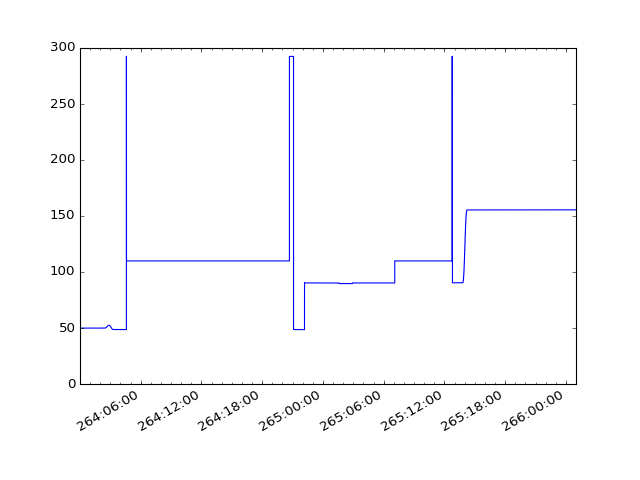

In [12]:
_ = plot_cxctime(times, vals)